In [1]:
# loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

# packages for statistical analysis
import statsmodels.api
import statsmodels.formula.api as smFrmApi
import statsmodels.stats as stats

from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import reset_ramsey

In [2]:
# function for making histograms
def myHist(x, xname, mybins=10):
    pd_x = pd.Series(x)
  
    # the Jarque-Bera test
    print('\n --- The Jarque-Bera normality test for '+ xname + '---')
    print(pd.DataFrame(scipy.stats.jarque_bera(x), columns=['value'],
                   index=['chi^2 test statistic', 'chi^2 test p-value']))
    # histogram
    pd_x.plot.hist(grid=True, bins=mybins, rwidth=0.9, color='lightblue')
    plt.title('Histogram for ' + xname)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()
    
    # Q-Q plot
    qqplot(x, line='s')

In [3]:
# read the data from MS Excel file
dfcollu = pd.read_excel('collusions_1.xlsx', 'data', index_col=None, na_values=['NA'])

In [4]:
dfcollu['logprice'] = np.log(dfcollu['price'])

In [5]:
dfcollu.head(6)

,auctionID,collusion,price,participants,reduction,difftimes,logprice
0,1,0,142500.00,3,3.500000,1,11.867097
1,2,0,13132900.00,11,63.568227,1,16.390631
2,3,0,7309500.00,3,54.540008,1,15.804685
3,4,0,86557.00,4,10.500121,1,11.368558
4,5,0,111249.90,3,4.000004,1,11.619534
5,6,0,54640.82,4,35.499467,1,10.908537


# Task 1

In [6]:
# Ectracting variables

# extract the variables
collusion = dfcollu['collusion']
price = dfcollu['price']
participants = dfcollu['participants']
reduction = dfcollu['reduction']
difftimes = dfcollu['difftimes']
logprice = dfcollu['logprice']

In [7]:
# The average of difftimes on the whole sample is greater than 50%

dfcollu.describe().round(3)

,auctionID,collusion,price,participants,reduction,difftimes,logprice
count,215.000,215.000,2.150000e+02,215.000,215.000,215.00,215.000
mean,108.000,0.563,3.537565e+06,2.726,10.062,0.54,14.014
std,62.209,0.497,6.059638e+06,1.344,12.915,0.50,1.559
min,1.000,0.000,6.480000e+03,2.000,0.500,0.00,8.776
25%,54.500,0.000,4.362397e+05,2.000,1.000,0.00,12.986
50%,108.000,1.000,1.093394e+06,2.000,1.654,1.00,13.905
75%,161.500,1.000,3.525825e+06,3.000,18.750,1.00,15.076
max,215.000,1.000,4.348700e+07,11.000,63.568,1.00,17.588


In [8]:
# Less than 30% of all auctions are with collusion

dfcollu.groupby('collusion')['participants'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
collusion,,,,,,,,
0,94.0,3.500,1.677,2.0,2.0,3.0,4.0,11.0
1,121.0,2.124,0.458,2.0,2.0,2.0,2.0,5.0


In [9]:
# Less than 30% of all auctions are with collusion

dfcollu['collusion'].value_counts()

1    121
0     94
Name: collusion, dtype: int64

In [10]:
# Pearson's correlation coefficient between logprice and reduction is negative, but statistically insignificant

scipy.stats.pearsonr(logprice, reduction)

PearsonRResult(statistic=-0.39409393764151646, pvalue=2.1112332126520262e-09)

In [11]:
# The mosaic graph shows that the greater majority of the auctions with collusion are the auctions with 2 participants
# contingency table
xTab = pd.crosstab(collusion, participants)
xTab

participants,2,3,4,5,6,7,8,10,11
collusion,,,,,,,,,
0,25,35,20,4,5,1,2,1,1
1,111,6,3,1,0,0,0,0,0


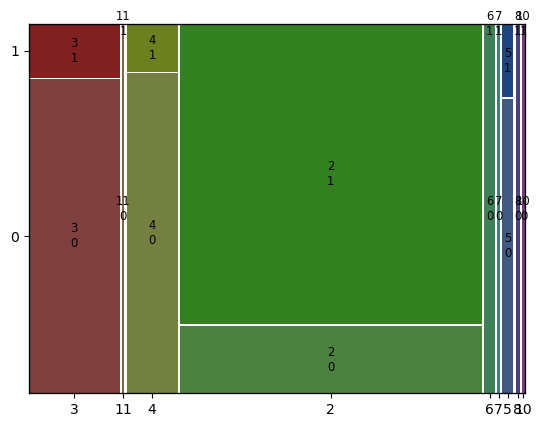

In [12]:
# first argument - x-axis; second argument - y-axis
#props = lambda key: {'color': 'gray'}
mosaic(dfcollu, ['participants', 'collusion'])
plt.show()

# Task 2

In [13]:
# The standard deviation of participants for the auctions without collusion is smaller (in absolute value) than the one for the auctions with collusion
dfcollu.groupby('collusion')['participants'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
collusion,,,,,,,,
0,94.0,3.500,1.677,2.0,2.0,3.0,4.0,11.0
1,121.0,2.124,0.458,2.0,2.0,2.0,2.0,5.0


<AxesSubplot: title={'center': 'participants'}, xlabel='collusion'>

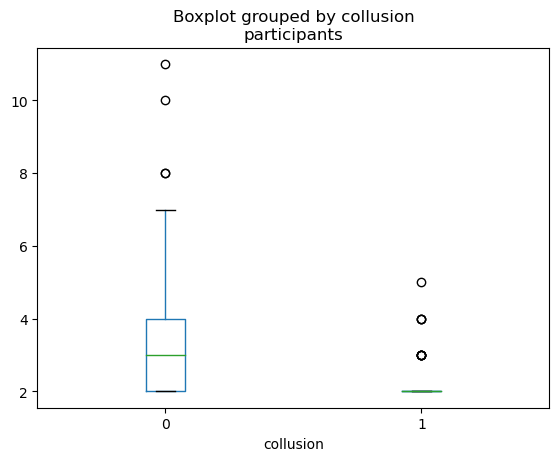

In [14]:
# boxplots of participants by groups
dfcollu.boxplot(column="participants", by="collusion", grid=False)

In [15]:
# compare the medians of TUCE
t_Ucollu, pVal_Ucollu = scipy.stats.mannwhitneyu(dfcollu['collusion'][dfcollu.collusion==0],
                                             dfcollu['collusion'][dfcollu.collusion==1])

print("Two-sample t-statistic = ", round(t_Ucollu,9))
print("Two-sample p-value = ", round(pVal_Ucollu,15))

Two-sample t-statistic =  0.0
Two-sample p-value =  0.0


In [16]:
# The median of logprice for the auctions with collusion is greater than 14
dfcollu.groupby('collusion')['logprice'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
collusion,,,,,,,,
0,94.0,12.978,1.275,8.776,12.061,12.955,13.797,16.391
1,121.0,14.819,1.259,11.497,13.804,14.811,15.775,17.588


<AxesSubplot: title={'center': 'logprice'}, xlabel='collusion'>

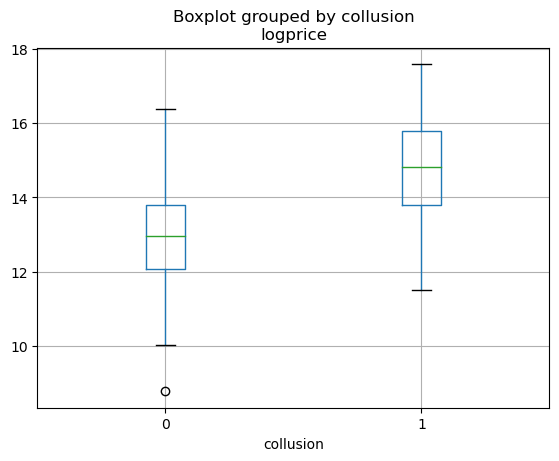

In [17]:
# boxplots of Logprice by groups
dfcollu.boxplot(column="logprice", by="collusion", grid=True)

In [18]:
# The mean values of logprice in the two groups of auctions are statistically different

# compare means of TUCE
eqVarcollusion = False
t_twotuce, pVal_twotuce = scipy.stats.ttest_ind(dfcollu['logprice'][dfcollu.collusion==0],
                                             dfcollu['logprice'][dfcollu.collusion==1], equal_var=eqVarcollusion)

print("Variance of Group0 =", round(np.var(dfcollu['logprice'][dfcollu.collusion==0], ddof=1),3))
print("Variance of Group1 =", round(np.var(dfcollu['logprice'][dfcollu.collusion==1], ddof=1),3))
print("Two-sample t-statistic =", round(t_twotuce,3))
print("Two-sample p-value =", round(pVal_twotuce,3))
print("equal_var =", eqVarcollusion)

Variance of Group0 = 1.625
Variance of Group1 = 1.584
Two-sample t-statistic = -10.56
Two-sample p-value = 0.0
equal_var = False


In [19]:
# The standard deviation of logprice for the auctions without collusion is smaller than 1 

dfcollu.groupby('collusion')['logprice'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
collusion,,,,,,,,
0,94.0,12.978,1.275,8.776,12.061,12.955,13.797,16.391
1,121.0,14.819,1.259,11.497,13.804,14.811,15.775,17.588


In [20]:
dfcollu.groupby('collusion')['difftimes'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
collusion,,,,,,,,
0,94.0,0.691,0.464,0.0,0.0,1.0,1.0,1.0
1,121.0,0.421,0.496,0.0,0.0,0.0,1.0,1.0


<AxesSubplot: title={'center': 'difftimes'}, xlabel='collusion'>

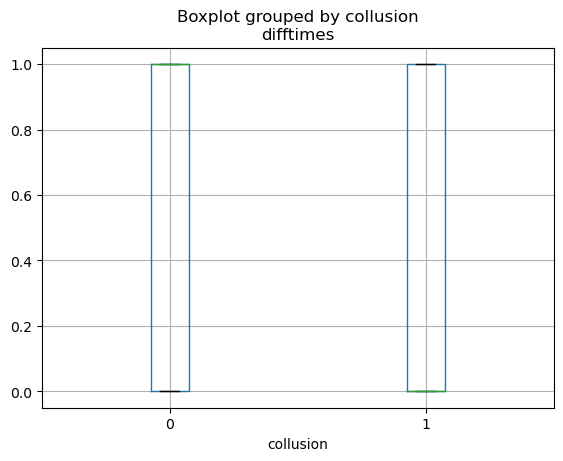

In [21]:
dfcollu.boxplot(column='difftimes', by='collusion', grid=True)

In [31]:
# The mean values of difftimes in the two groups of auctions are not statistically different
# compare means of TUCE
eqVarcollusion = False
t_twotuce, pVal_twotuce = scipy.stats.ttest_ind(dfcollu['difftimes'][dfcollu.collusion==0],
                                             dfcollu['difftimes'][dfcollu.collusion==1], equal_var=eqVarcollusion)

print("Variance of Group0 =", round(np.var(dfcollu['difftimes'][dfcollu.collusion==0], ddof=1),3))
print("Variance of Group1 =", round(np.var(dfcollu['difftimes'][dfcollu.collusion==1], ddof=1),3))
print("Two-sample t-statistic =", round(t_twotuce,3))
print("Two-sample p-value =", round(pVal_twotuce,3))
print("equal_var =", eqVarcollusion)

Variance of Group0 = 0.216
Variance of Group1 = 0.246
Two-sample t-statistic = 4.105
Two-sample p-value = 0.0
equal_var = False


In [32]:
# The minimum value of reduction for the auctions without collusion is 0.5

dfcollu.groupby('collusion')['reduction'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
collusion,,,,,,,,
0,94.0,21.140,12.604,1.714,11.357,20.003,28.786,63.568
1,121.0,1.455,1.865,0.500,1.000,1.000,1.002,15.668


# Task 3

Estimate the following logit-regression:

In [33]:
# estimate Model 1
model1 = smFrmApi.logit('collusion ~ logprice + participants + reduction + difftimes', dfcollu).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.120384
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              collusion   No. Observations:                  215
Model:                          Logit   Df Residuals:                      210
Method:                           MLE   Df Model:                            4
Date:                Sun, 17 Dec 2023   Pseudo R-squ.:                  0.8243
Time:                        12:30:48   Log-Likelihood:                -25.883
converged:                       True   LL-Null:                       -147.33
Covariance Type:            nonrobust   LLR p-value:                 2.215e-51
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.5876      4.657     -1.629      0.103     -16.715       1.539
logprice         1.0538      0.336      3.135      0.002       0.395       1.713
participants    -1.2682      0.538     -2.356      0.018      -2.323      -0.213
reduction       -0.4139      0.093     -4.437      0.000      -0.597      -0.231
difftimes       -1.6604      0.851     -1.951      0.051      -3.328       0.007
================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""


 --- The Jarque-Bera normality test for Residuals of the Logit model---
                            value
chi^2 test statistic  2447.051148
chi^2 test p-value       0.000000


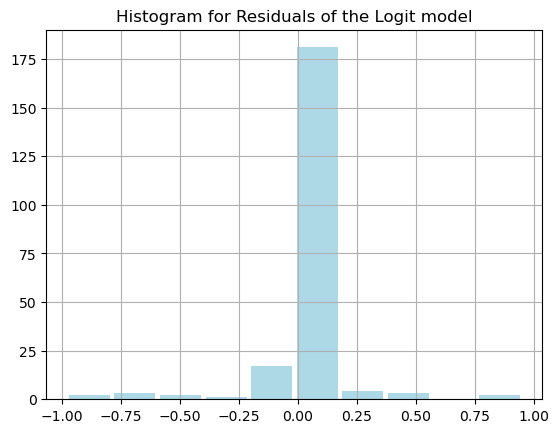

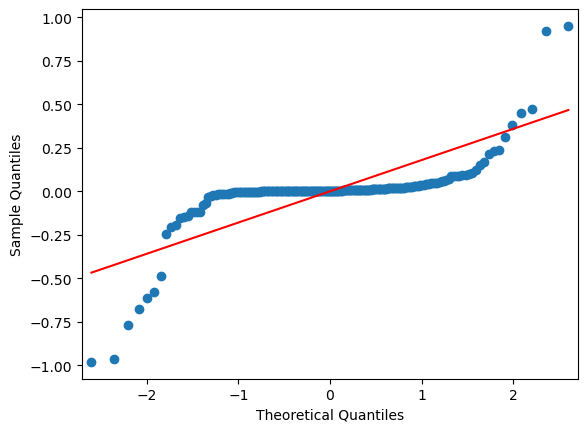

In [34]:
# check the residuals of Model 2
myHist(model1.resid_response, 'Residuals of the Logit model')

# Task 4

Study marginal effects at the average point for the estimated logit-model. Plot probability response curves for difftimes as related to participants.

In [35]:
# marginal effects at the average point
print(model1.get_margeff(at='mean').summary()) 

        Logit Marginal Effects       
Dep. Variable:              collusion
Method:                          dydx
At:                              mean
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
logprice         0.1736      0.099      1.753      0.080      -0.020       0.368
participants    -0.2089      0.117     -1.783      0.075      -0.439       0.021
reduction       -0.0682      0.018     -3.753      0.000      -0.104      -0.033
difftimes       -0.2735      0.185     -1.478      0.140      -0.636       0.089


In [36]:
dfPRC = pd.DataFrame(np.linspace(2, 11, num=50), columns=['participants'])

In [37]:
dfPRC

,participants
0,2.000000
1,2.183673
2,2.367347
3,2.551020
4,2.734694
5,2.918367
6,3.102041
7,3.285714
8,3.469388
9,3.653061


In [38]:
# data frame for students with difftime=0
dfPSI0 = dfPRC.copy(deep=True)
dfPSI0['reduction'] = np.mean(reduction)
dfPSI0['logprice'] = np.mean(logprice)
dfPSI0['difftimes'] = 0
dfPSI0.head()

,participants,reduction,logprice,difftimes
0,2.000000,10.061519,14.014219,0
1,2.183673,10.061519,14.014219,0
2,2.367347,10.061519,14.014219,0
3,2.551020,10.061519,14.014219,0
4,2.734694,10.061519,14.014219,0


In [39]:
# predictions for students with PSI=0
predcolludifftime0 = model1.predict(dfPSI0)

In [40]:
# data frame for students with difftime=1
dfPSI1 = dfPRC.copy(deep=True)
dfPSI1['reduction'] = np.mean(reduction)
dfPSI1['logprice'] = np.mean(logprice)
dfPSI1['difftimes'] = 1
dfPSI1.head()

,participants,reduction,logprice,difftimes
0,2.000000,10.061519,14.014219,1
1,2.183673,10.061519,14.014219,1
2,2.367347,10.061519,14.014219,1
3,2.551020,10.061519,14.014219,1
4,2.734694,10.061519,14.014219,1


In [41]:
# predictions for students with PSI=1
predcolludifftime1 = model1.predict(dfPSI1)

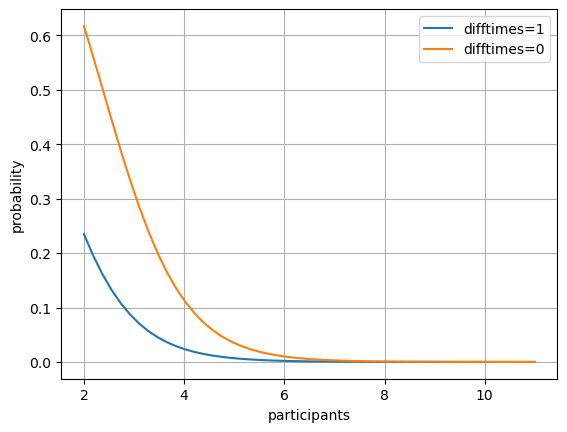

In [42]:
# probability response curves
plt.plot(dfPRC['participants'], predcolludifftime1, label="difftimes=1")
plt.plot(dfPRC['participants'], predcolludifftime0, label="difftimes=0")
plt.xlabel('participants'); plt.ylabel('probability')
plt.grid(); plt.legend()
plt.show()

In [43]:
dfcollu.set_index('auctionID', inplace=True)

In [44]:
dfcollupred = dfcollu.loc[[3,4,47,49]]

In [45]:
dfcollupred

,collusion,price,participants,reduction,difftimes,logprice
auctionID,,,,,,
3,0,7309500.00,3,54.540008,1,15.804685
4,0,86557.00,4,10.500121,1,11.368558
47,1,665070.00,2,15.668366,0,13.407648
49,1,959198.45,2,0.999976,0,13.773853


In [46]:
dfcollupred = dfcollupred.reset_index(drop=True)

In [47]:
# out-of-sample predictions -- for students 31 and 32 (careful with indexing!)
predictions = model1.predict(dfcollupred)

In [74]:
predictions.apply(lambda x: "{:.10f}".format(x))

0    0.1195839098
1    0.0000000000
2    0.9921189886
3    0.9098727381
dtype: object

In [48]:
dfcollu.describe().round(3)

,collusion,price,participants,reduction,difftimes,logprice
count,215.000,2.150000e+02,215.000,215.000,215.00,215.000
mean,0.563,3.537565e+06,2.726,10.062,0.54,14.014
std,0.497,6.059638e+06,1.344,12.915,0.50,1.559
min,0.000,6.480000e+03,2.000,0.500,0.00,8.776
25%,0.000,4.362397e+05,2.000,1.000,0.00,12.986
50%,1.000,1.093394e+06,2.000,1.654,1.00,13.905
75%,1.000,3.525825e+06,3.000,18.750,1.00,15.076
max,1.000,4.348700e+07,11.000,63.568,1.00,17.588
